In [7]:
import sys
sys.path.append('../utils')
from dataset_split_tfidf import load_and_split_data

X_train, X_test, y_train, y_test = load_and_split_data()

In [8]:
import joblib
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# evaluate the model
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# save the model
joblib.dump(svm_model, './tfidf_models/svm_model.pkl')


Accuracy: 0.7134520963471376
              precision    recall  f1-score   support

    negative       0.71      0.71      0.71     19107
    positive       0.72      0.72      0.72     19794

    accuracy                           0.71     38901
   macro avg       0.71      0.71      0.71     38901
weighted avg       0.71      0.71      0.71     38901



['./tfidf_models/svm_model.pkl']

In [9]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

# load the model
svm_model = joblib.load('./tfidf_models/svm_model.pkl')

# predict
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

Accuracy: 0.7134520963471376
              precision    recall  f1-score   support

    negative       0.71      0.71      0.71     19107
    positive       0.72      0.72      0.72     19794

    accuracy                           0.71     38901
   macro avg       0.71      0.71      0.71     38901
weighted avg       0.71      0.71      0.71     38901



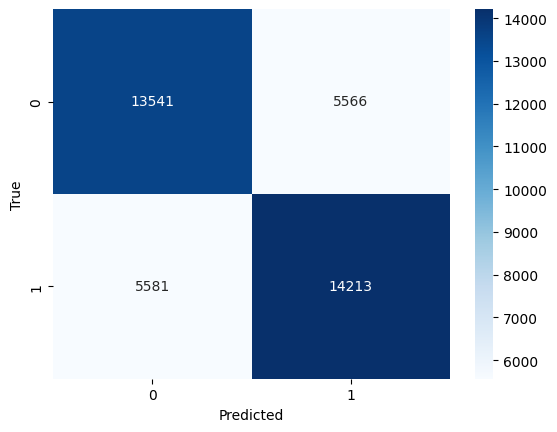

In [10]:
# draw confusion matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

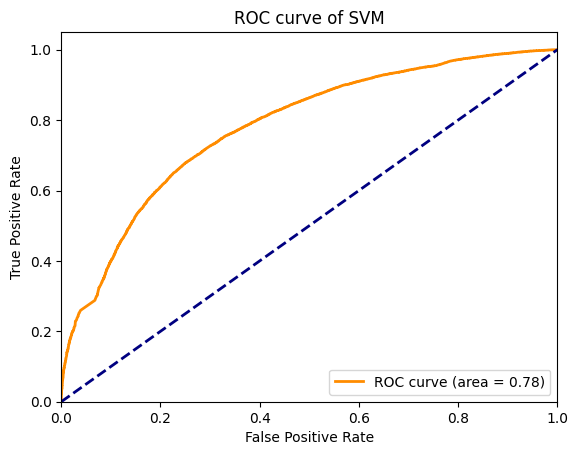

<Figure size 640x480 with 0 Axes>

In [11]:
# draw ROC curve
from sklearn.metrics import roc_curve, auc
import numpy as np

y_score = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of SVM')
plt.legend(loc='lower right')
plt.show()

# save the ROC curve as npy file
np.save('./tfidf_models/svm_fpr.npy', fpr)

# save the ROC curve as png file
plt.savefig('./tfidf_models/svm_roc.png')